In [4]:
import pandas as pd
import os
os.chdir("D:\\Varun\\BIA\\Python")

In [8]:
df=pd.read_csv("sales_data.csv")
df

,OrderID,Category,SubCategory,SalesPrice,Cost,ProfitMargin,CustomerRating,QuantitySold,DateOfSale
0,1,Clothing,Jeans,754.87,605.64,149.23,4,4,2021-06-17
1,2,Home Appliances,Washing Machine,349.42,238.80,110.62,4,3,2023-12-16
2,3,Home Appliances,Microwave,988.00,810.49,177.51,5,4,2023-05-02
3,4,Furniture,Bed,375.24,308.84,66.40,2,10,2024-11-08
4,5,Home Appliances,Blender,1819.61,1315.78,503.83,3,9,2021-10-14
...,...,...,...,...,...,...,...,...,...
95,96,Home Appliances,Air Conditioner,1510.89,1120.02,390.87,3,9,2023-04-17
96,97,Clothing,T-Shirt,264.05,161.74,102.31,5,3,2024-03-05
97,98,Clothing,Jacket,412.46,257.26,155.20,4,1,2023-08-28
98,99,Electronics,Smartwatch,934.76,782.15,152.61,5,3,2022-03-18


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         100 non-null    int64  
 1   Category        100 non-null    object 
 2   SubCategory     100 non-null    object 
 3   SalesPrice      100 non-null    float64
 4   Cost            100 non-null    float64
 5   ProfitMargin    100 non-null    float64
 6   CustomerRating  100 non-null    int64  
 7   QuantitySold    100 non-null    int64  
 8   DateOfSale      100 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 7.2+ KB


In [14]:
#total sales grouped by category
df_gr=df.groupby("Category")["SalesPrice"].sum()
df_gr

Category
Clothing           32840.38
Electronics        15574.16
Furniture          26879.23
Home Appliances    26734.05
Name: SalesPrice, dtype: float64

In [18]:
df_gr1=df.groupby(["Category","SubCategory"])["ProfitMargin"].sum()
df_gr1

Category         SubCategory    
Clothing         Jacket             2063.66
                 Jeans              1460.86
                 Shoes               814.97
                 Sweater            2173.03
                 T-Shirt            2417.50
Electronics      Headphones          774.74
                 Laptop              766.32
                 Smartphone          584.08
                 Smartwatch          774.80
                 Tablet              428.01
Furniture        Bed                1149.62
                 Bookshelf          2160.99
                 Chair               448.38
                 Sofa                723.08
                 Table              1316.45
Home Appliances  Air Conditioner    1636.92
                 Blender            1556.64
                 Microwave          1310.72
                 Refrigerator        960.78
                 Washing Machine     869.47
Name: ProfitMargin, dtype: float64

In [26]:
#more than one aggregate on one column
df_grp2=df.groupby("Category")["SalesPrice"].agg(['sum','max'])
df_grp2

,sum,max
Category,,
Clothing,32840.38,1927.96
Electronics,15574.16,1945.82
Furniture,26879.23,1945.42
Home Appliances,26734.05,1989.27


In [28]:
#multiple column and multiple aggregate funcs
df_grp3=df.groupby("Category").agg({"SalesPrice":"sum","Cost":"mean","ProfitMargin":"min"})
df_grp3

,SalesPrice,Cost,ProfitMargin
Category,,,
Clothing,32840.38,724.556364,32.06
Electronics,15574.16,874.729286,62.57
Furniture,26879.23,810.796538,13.99
Home Appliances,26734.05,755.537778,11.71


In [32]:
#single column multiple aggregate funcs
df_grp4=df.groupby("Category").agg({"SalesPrice":["sum","mean"],"Cost":["mean","count"],"ProfitMargin":["max","min"]})
df_grp4

SalesPrice                     Cost       ProfitMargin       
                       sum         mean        mean count          max    min
Category                                                                     
Clothing          32840.38   995.163030  724.556364    33       732.12  32.06
Electronics       15574.16  1112.440000  874.729286    14       493.22  62.57
Furniture         26879.23  1033.816538  810.796538    26       553.71  13.99
Home Appliances   26734.05   990.150000  755.537778    27       503.83  11.71

In [48]:
df6=df.groupby("Category")["QuantitySold"].sum()
df6
# the output is series because its considering only on co(numeric values) and the first col is being considered as index to change that we are using reset index to give the index 

Category
Clothing           191
Electronics         74
Furniture          151
Home Appliances    136
Name: QuantitySold, dtype: int64

In [38]:
#to give index values to the above output
df_grp5=df.groupby("Category")["QuantitySold"].sum().reset_index()
df_grp5

,Category,QuantitySold
0,Clothing,191
1,Electronics,74
2,Furniture,151
3,Home Appliances,136


In [44]:
df_grp5[df_grp5["QuantitySold"]>150]

,Category,QuantitySold
0,Clothing,191
2,Furniture,151


In [50]:
import matplotlib.pyplot as plt

In [64]:
#to change the data type to date and time
df["DateOfSale"]=pd.to_datetime(df["DateOfSale"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         100 non-null    int64         
 1   Category        100 non-null    object        
 2   SubCategory     100 non-null    object        
 3   SalesPrice      100 non-null    float64       
 4   Cost            100 non-null    float64       
 5   ProfitMargin    100 non-null    float64       
 6   CustomerRating  100 non-null    int64         
 7   QuantitySold    100 non-null    int64         
 8   DateOfSale      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 7.2+ KB


In [68]:
#sorting it and to make the changes permanent we use inplace
df.sort_values(by="DateOfSale",inplace=True)

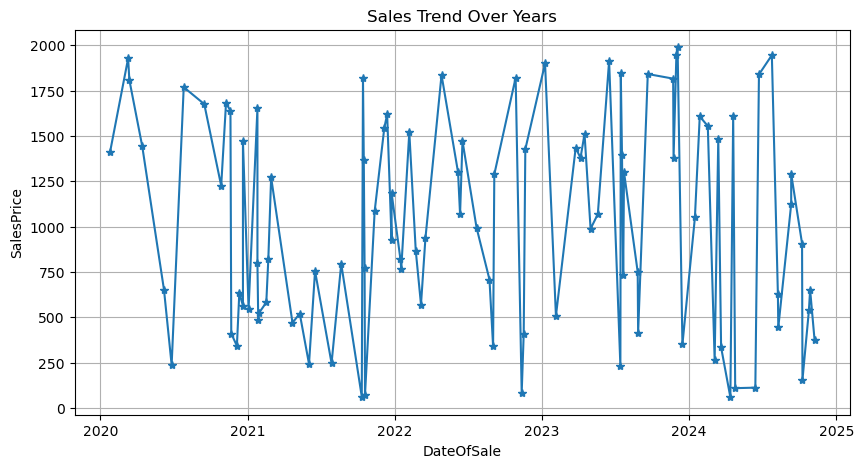

In [70]:
##line charts
plt.figure(figsize=(10,5))
plt.plot(df['DateOfSale'],df['SalesPrice'],marker="*")
plt.xlabel('DateOfSale')
plt.ylabel('SalesPrice')
plt.title('Sales Trend Over Years')
plt.grid(True)
plt.show()

In [72]:
#total sales grouped by category
df_gr=df.groupby("Category")["SalesPrice"].sum()
df_gr

Category
Clothing           32840.38
Electronics        15574.16
Furniture          26879.23
Home Appliances    26734.05
Name: SalesPrice, dtype: float64

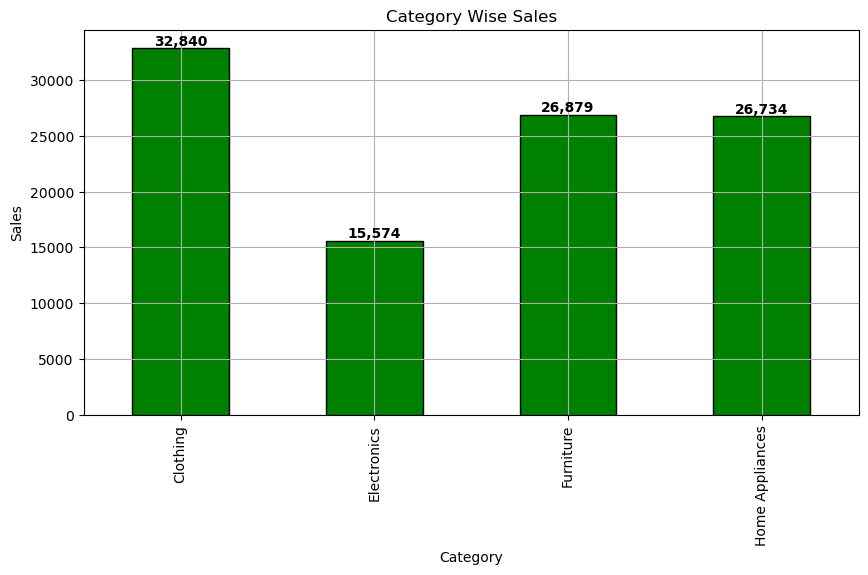

In [82]:
#bar chart
plt.figure(figsize=(10,5))
ax=df_gr.plot(kind='bar',color='green',edgecolor='black')
# Add Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X-coordinate (bar center)
            p.get_height(),                 # Y-coordinate (top of the bar)
            f'{p.get_height():,.0f}',       # Formatting number (thousands separator)
            ha='center', va='bottom',       # Align text
            fontsize=10, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category Wise Sales')
plt.grid(True)
plt.show()

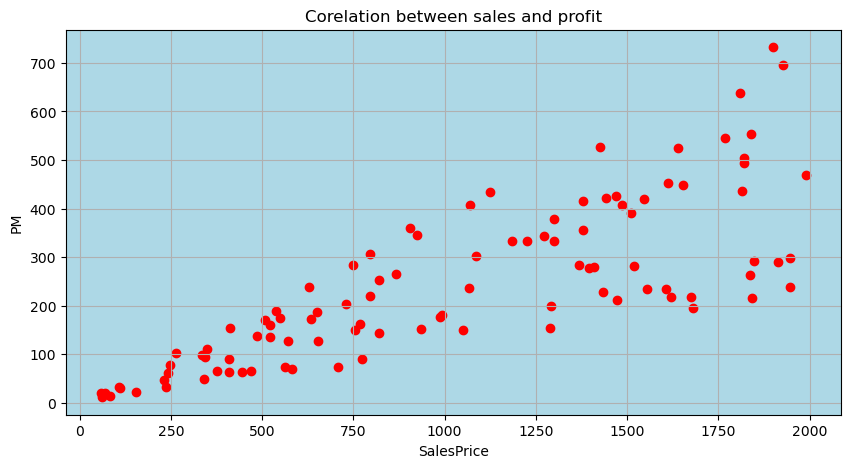

In [88]:
#scatter plots-relationship between 2 numeric values
plt.figure(figsize=(10,5))
plt.scatter(df['SalesPrice'],df['ProfitMargin'],color='red')
ax=plt.gca()
ax.set_facecolor("lightblue")
plt.xlabel('SalesPrice')
plt.ylabel('PM')
plt.title('Corelation between sales and profit')
plt.grid(True)
plt.show()

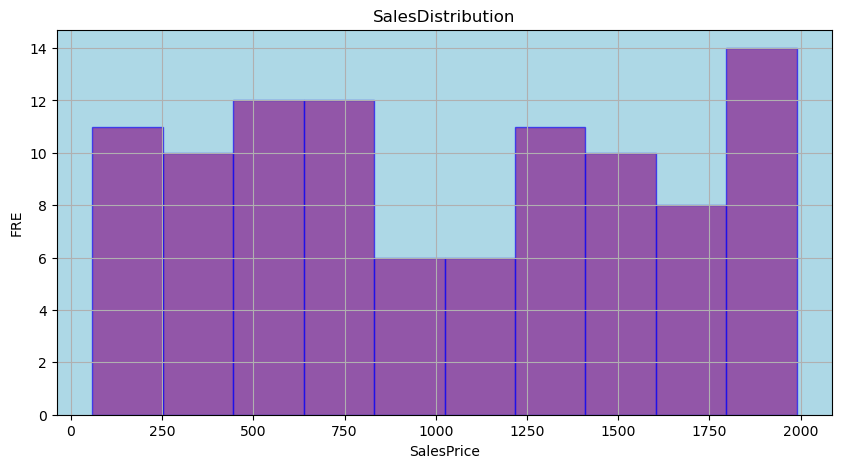

In [96]:
#Histogram 
plt.figure(figsize=(10,5))
ax=plt.gca()
plt.hist(df['SalesPrice'],bins=10,color='purple',edgecolor='blue',alpha=0.6)
ax.set_facecolor("lightblue")
plt.xlabel('SalesPrice')
plt.ylabel('FRE')
plt.title('SalesDistribution')
#save image
plt.savefig('SalesDistribution.png',dpi=300)
plt.grid(True)
plt.show()

In [94]:
len(df[(df['SalesPrice']>1750) & (df['SalesPrice']<2000)])

15